# Intruduction to Exploratory Data Analysis
  ### Using Pandas!

# **Step 0: Imports and Reading Data**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns',200)

In [2]:
df=pd.read_csv('/content/coaster_db.csv')

# **Step 01: Data Understanding**
  - DataFrame shape
  - head and tail
  - dtypes
  -describe

In [3]:
df.shape

(1087, 56)

In [4]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# **Step 02: Data Preperation**
  - Dropping irrelevant columns and rows
  - Identifying duplicated columns
  - Renaming Columns
  - Feature Creation

In [7]:
df=df[['coaster_name','Location','Status','Manufacturer','year_introduced', 'latitude', 'longitude', 'Type_Main','opening_date_clean',
       'speed_mph',  'height_ft','Inversions_clean', 'Gforce_clean']].copy()

In [8]:
df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [9]:
df.shape

(1087, 13)

In [10]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [11]:
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])

In [12]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [13]:
# Rename our columns
df.columns=df.columns.str.lower().str.replace(' ','_')

In [14]:
df

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [15]:
df.isna().sum()

coaster_name            0
location                0
status                213
manufacturer           59
year_introduced         0
latitude              275
longitude             275
type_main               0
opening_date_clean    250
speed_mph             150
height_ft             916
inversions_clean        0
gforce_clean          725
dtype: int64

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [17]:
# Check for duplicate coaster name
df.loc[df.duplicated(subset=['coaster_name'])]

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [18]:
df.query('coaster_name == "Zippin Pippin"')

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
16,Zippin Pippin,Other,NaN,The Gravity Group,1912,NaN,NaN,Wood,NaT,40.0,NaN,0,NaN
858,Zippin Pippin,Other,NaN,The Gravity Group,2011,NaN,NaN,Wood,NaT,40.0,NaN,0,NaN


In [19]:
df=df.loc[~df.duplicated(subset=['coaster_name','location','opening_date_clean'])] \
    .reset_index(drop=True).copy()

In [20]:
df.head()

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [21]:
df.shape

(990, 13)

# **Step 03: Feature Understanding**
#### (Univariate analysis)
  - Plotting Feature Distributions
     - Histogram
     - KDE
     - Boxplot

Text(0, 0.5, 'Count')

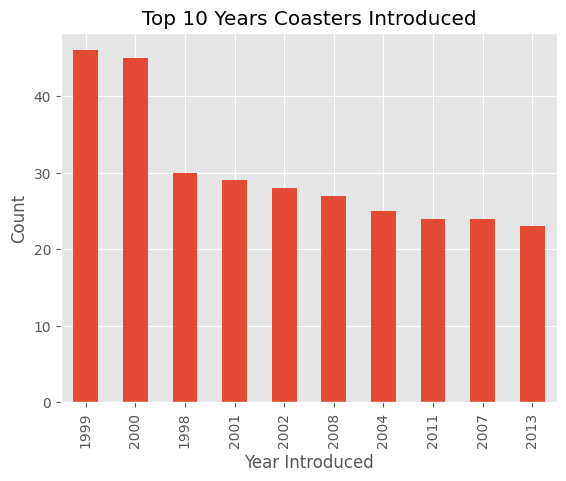

In [22]:
ax =df['year_introduced'].value_counts() \
     .head(10) \
     .plot(kind='bar',title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

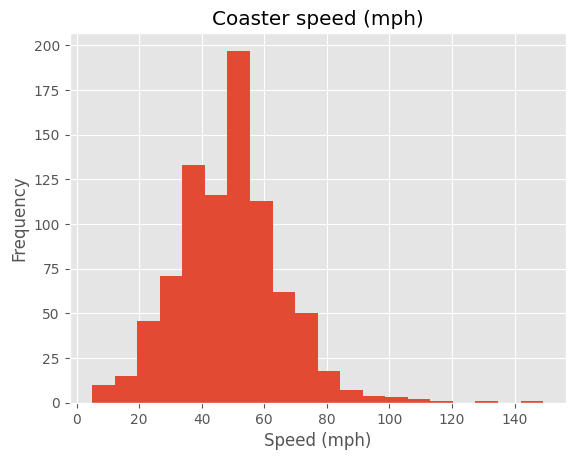

In [23]:
ax = df['speed_mph'].plot(kind='hist',bins=20 , title='Coaster speed (mph)')
ax.set_xlabel('Speed (mph)')


# **Step 04: Feature Relationships**
   - Scatterplot
   - Heatmap Correlation
   - Pairplot
   - Groupby comparisons

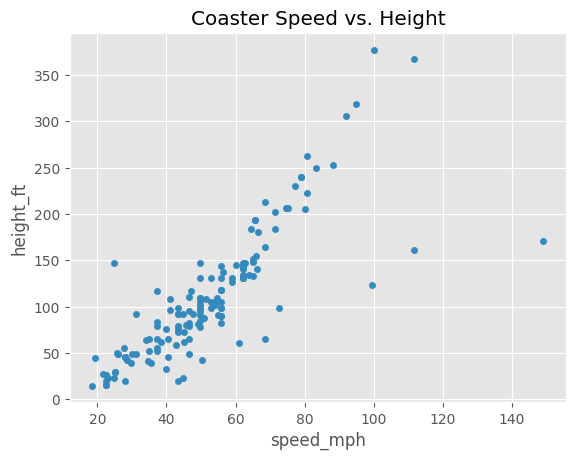

In [24]:
df.plot(kind='scatter', x= 'speed_mph',y='height_ft',
        title='Coaster Speed vs. Height')
plt.show()

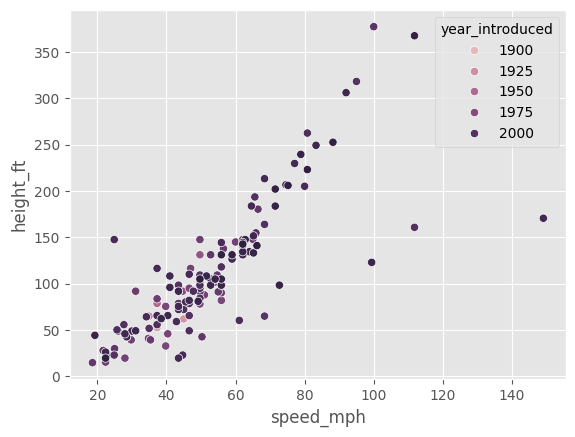

In [25]:
sns.scatterplot(x='speed_mph',
                y = 'height_ft',
                hue = 'year_introduced',
                data=df)
plt.show()

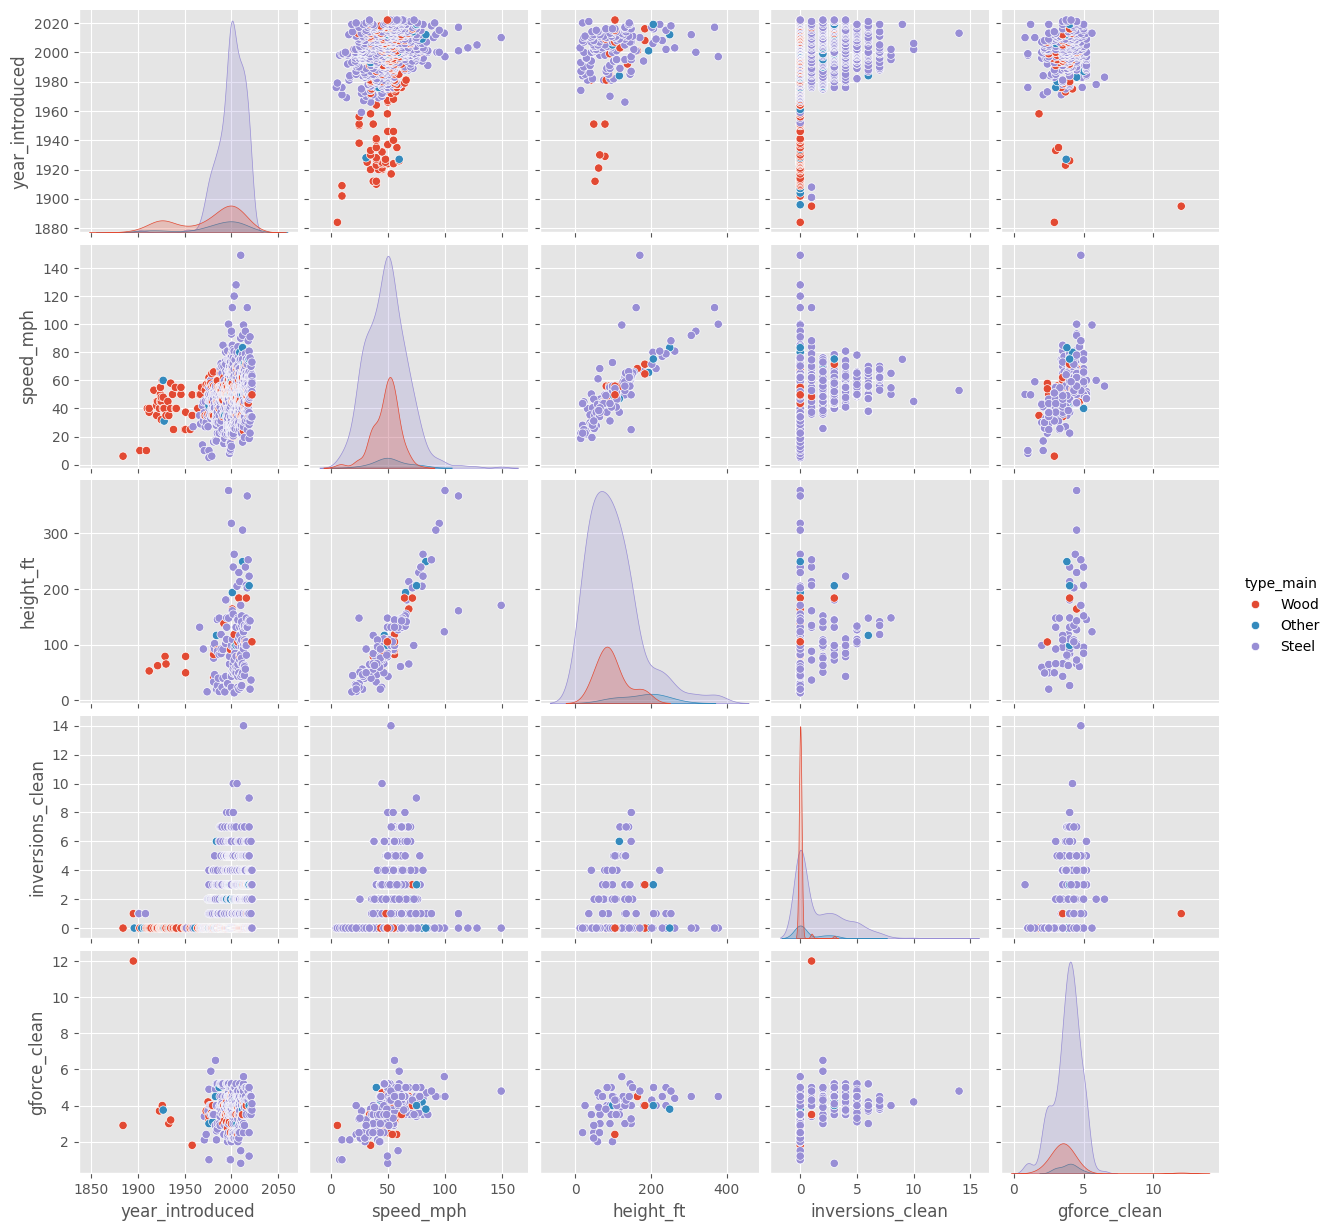

In [26]:
sns.pairplot(df,vars=['year_introduced','speed_mph','height_ft','inversions_clean','gforce_clean'],
             hue='type_main')
plt.show()

In [28]:
df[['year_introduced','speed_mph','height_ft',
   'inversions_clean','gforce_clean']].dropna().corr()

,year_introduced,speed_mph,height_ft,inversions_clean,gforce_clean
year_introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
inversions_clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
gforce_clean,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

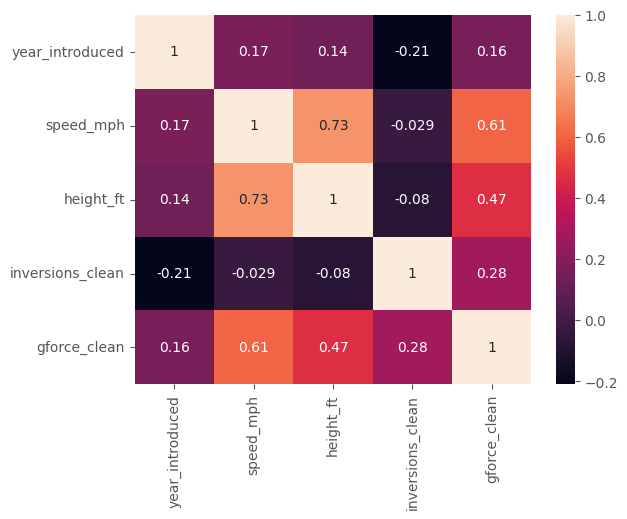

In [30]:
df_corr= df[['year_introduced','speed_mph','height_ft',
   'inversions_clean','gforce_clean']].dropna().corr()

sns.heatmap(df_corr,annot=True)

# **Step 5: Ask a Question about the data**
   - Try to answer a question I  have about the data using a plot or statistic

 -- What are the locations with the fastest roller coasters(minimum of 10)?

In [31]:
df['location'].value_counts()

location
Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: count, Length: 280, dtype: int64

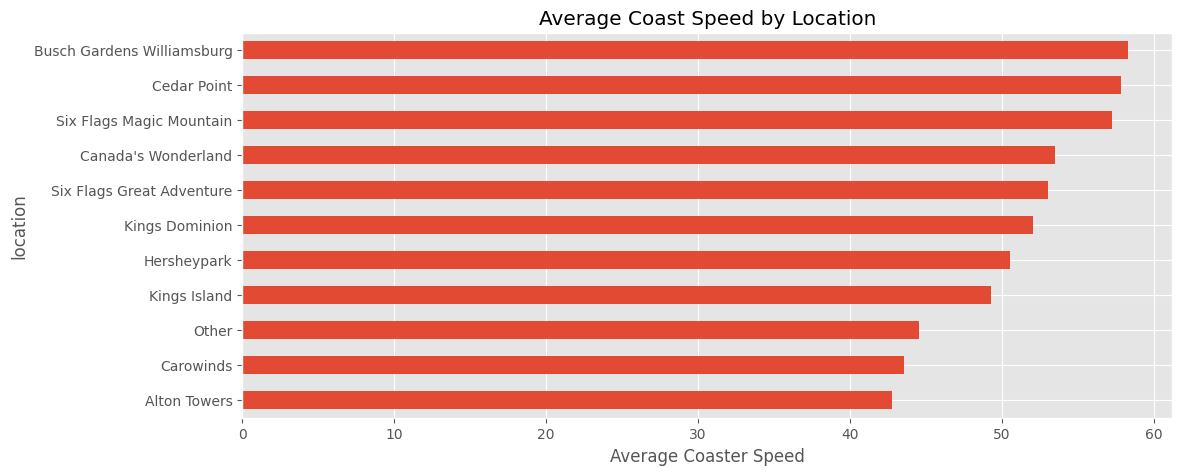

In [39]:
ax = df.query('location != "other"') \
     .groupby('location')['speed_mph']  \
     .agg(['mean','count']) \
     .query('count >= 10') \
     .sort_values('mean')['mean'] \
     .plot(kind='barh',figsize=(12,5),title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()